## Lab 4

First, we start off by repeating some stuff from the start of Lab 3, also adding Pandas into the mix.

In [19]:
# Preamble
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pyart
import glob
from mpl_toolkits.basemap import Basemap
import pandas as pd
path = "/scratch/scholar/r/rtanama/PurRad2018/"
cfFiles = glob.glob(path+"/IOP2-20180305/cfradial/moments/low/sur/20180305/20180305/*")
cfFiles.sort()

/depot/mebaldwi/apps/anaconda/lib/python2.7/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2018-04-05 13:50:14.604599. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


In [28]:
filename = cfFiles[196]
radar = pyart.io.read(filename)
display = pyart.graph.RadarMapDisplay(radar)

/depot/mebaldwi/apps/anaconda/lib/python2.7/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2018-04-05 13:51:02.267733. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


/depot/mebaldwi/apps/anaconda/lib/python2.7/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2018-04-05 14:55:05.526203. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


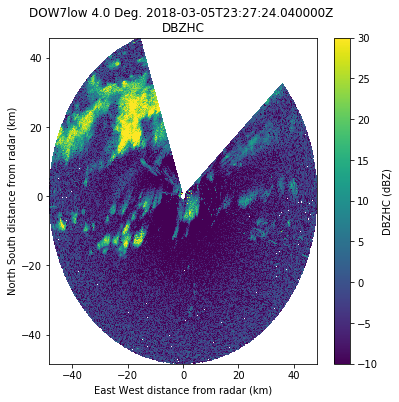

In [75]:
plt.clf()
fig = plt.figure(figsize=(6,6))
display.plot('DBZHC',0,vmin=-10.,vmax=30.)

In [82]:
radar.fields.keys()

/depot/mebaldwi/apps/anaconda/lib/python2.7/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2018-04-12 17:36:53.337324. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


[u'VS1',
 u'DBZVC_F',
 u'VS1_F',
 u'DBZHC',
 u'ZDR',
 u'WIDTH',
 u'RHOHV',
 u'DBMVC_F',
 u'KDP_F',
 u'WIDTH_F',
 u'ZDRM_F',
 u'ZDR_F',
 u'DBMHC',
 u'RHOHV_F',
 u'SNRHC_F',
 u'KDP',
 u'SNRHC',
 u'DBMHC_F',
 'sounding_temperature',
 u'PHIDP_F',
 u'DBZVC',
 u'VL1',
 u'NCP_F',
 u'VEL',
 'height',
 u'SNRVC',
 u'PHIDP',
 u'NCP',
 u'VL1_F',
 u'ZDRM',
 u'DBMVC',
 u'SNRVC_F',
 u'DBZHC_F',
 u'VEL_F']

To compute hydrometeor class, we need a temperature field. Let's grab the nearest ILX sounding in time for simplicity.
Link: http://weather.uwyo.edu/upperair/sounding.html

Select "Text: List" and then summon the nearest ILX sounding in time using the pull-down menus. Copy and paste the sounding text into a text file (e.g., 'sounding.txt'). Exclude the calculated indices at the bottom.

```
-----------------------------------------------------------------------------
   PRES   HGHT   TEMP   DWPT   RELH   MIXR   DRCT   SKNT   THTA   THTE   THTV
    hPa     m      C      C      %    g/kg    deg   knot     K      K      K 
-----------------------------------------------------------------------------
 1000.0    129                                                               
  994.0    178    3.4    1.8     89   4.40    355      6  277.0  289.2  277.8
  991.0    203    3.0    0.3     82   3.96    356      6  276.9  287.9  277.5
  962.0    442    0.6   -0.3     94   3.91     10      8  276.8  287.7  277.4
  942.0    610   -0.5   -1.3     94   3.70     20      9  277.3  287.7  277.9
  ... etc ...
```

Now, let's use pandas to read these data in. We'll use the info in Lines 1 and 2 as header information (field and units), and skip Lines 3 ('-----') and 4 (which only has two values in it, and will confuse pandas).

In [47]:
sounding = pd.read_csv('sounding.txt',header=[1,2],delim_whitespace=True,skiprows=[3,4])
sounding

/depot/mebaldwi/apps/anaconda/lib/python2.7/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2018-04-05 14:27:03.859145. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


,PRES,HGHT,TEMP,DWPT,RELH,MIXR,DRCT,SKNT,THTA,THTE,THTV
,hPa,m,C,C,%,g/kg,deg,knot,K,K,K
0,994.0,178,3.4,1.8,89,4.40,355.0,6.0,277.0,289.2,277.8
1,991.0,203,3.0,0.3,82,3.96,356.0,6.0,276.9,287.9,277.5
2,962.0,442,0.6,-0.3,94,3.91,10.0,8.0,276.8,287.7,277.4
3,942.0,610,-0.5,-1.3,94,3.70,20.0,9.0,277.3,287.7,277.9
4,925.0,756,-1.5,-2.2,95,3.53,40.0,11.0,277.8,287.7,278.4
5,913.0,860,-1.3,-2.7,90,3.45,53.0,14.0,279.0,288.8,279.6
6,906.9,914,-0.0,-0.9,93,3.96,60.0,15.0,280.9,292.1,281.6
7,904.0,939,0.6,-0.1,95,4.22,61.0,15.0,281.8,293.7,282.5
8,885.0,1110,-0.1,-0.6,96,4.16,66.0,14.0,282.8,294.6,283.5


Now, let's make a new field in our radar object corresponding to the temperature at the height of the beam.

See this notebook for the original source code: https://github.com/EVS-ATMOS/cmac2.0/blob/master/notebooks/xsapr_cmac_hook.ipynb

Extract the height and temperature data from the sounding DataFrame object using np.array():

In [63]:
hght = np.array(sounding["HGHT"]).squeeze()
temp = np.array(sounding["TEMP"]).squeeze()

/depot/mebaldwi/apps/anaconda/lib/python2.7/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2018-04-05 14:42:06.244320. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


/depot/mebaldwi/apps/anaconda/lib/python2.7/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2018-04-05 14:54:07.014570. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


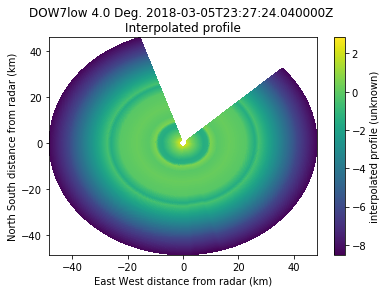

In [70]:
h_dict, t_dict = pyart.retrieve.map_profile_to_gates(temp, hght, radar)
radar.add_field('sounding_temperature', t_dict, replace_existing=True)
radar.add_field('height', h_dict, replace_existing=True)
display.plot('sounding_temperature',0)

In [67]:
hydro = pyart.retrieve.echo_class.hydroclass_semisupervised(radar, refl_field='DBZHC', zdr_field='ZDR', rhv_field='RHOHV', kdp_field='KDP', temp_field='sounding_temperature', hydro_field='hydro')

/depot/mebaldwi/apps/anaconda/lib/python2.7/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2018-04-05 14:46:50.498137. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


AttributeError: 'module' object has no attribute 'hydroclass_semisupervised'

In [80]:
radar.add_field('hydro',hydro, replace_existing=True)
display.plot('hydro',0)

/depot/mebaldwi/apps/anaconda/lib/python2.7/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2018-04-11 16:34:48.513477. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


NameError: name 'hydro' is not defined

0 = DS (dry snow)
1 = CR (ice crystals)
2 = LR (light rain)
3 = GR (graupel)
4 = RN (rain)
5 = VI (vertically aligned ice)
6 = WS (wet snow)
7 = MH (melting hail)
8 = IH/HDG (ice hail / high density graupel)